In [1]:
!pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install geopandas
!pip install geoplot
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 90.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 85.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.5 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102746 sha256=a74

In [3]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import plotly
import plotly.express as px
import xlrd
import random
import seaborn as sns
import matplotlib.colors as colors 




from shapely.geometry import Point

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:9: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/m

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#download map of US with county boundaries
county = ("/content/gdrive/MyDrive/Team 52 Project Folders/Datasets/cb_2022_us_county_500k.shp")

county = gpd.read_file(county)

In [6]:
type(county)

geopandas.geodataframe.GeoDataFrame

In [7]:
county.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,069,00161560,0500000US01069,01069,Houston,Houston County,AL,Alabama,06,1501742235,4795415,"POLYGON ((-85.71209 31.19727, -85.70934 31.198..."
1,01,023,00161537,0500000US01023,01023,Choctaw,Choctaw County,AL,Alabama,06,2365900083,19114321,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,005,00161528,0500000US01005,01005,Barbour,Barbour County,AL,Alabama,06,2292160151,50523213,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
3,01,107,00161580,0500000US01107,01107,Pickens,Pickens County,AL,Alabama,06,2282835044,22621093,"POLYGON ((-88.34043 32.99120, -88.33101 33.072..."
4,01,033,00161542,0500000US01033,01033,Colbert,Colbert County,AL,Alabama,06,1535742270,79160396,"POLYGON ((-88.13925 34.58779, -88.13872 34.589..."


In [8]:
county['STATE_NAME'].value_counts()

Texas                                           254
Georgia                                         159
Virginia                                        133
Kentucky                                        120
Missouri                                        115
Kansas                                          105
Illinois                                        102
North Carolina                                  100
Iowa                                             99
Tennessee                                        95
Nebraska                                         93
Indiana                                          92
Ohio                                             88
Minnesota                                        87
Michigan                                         83
Mississippi                                      82
Puerto Rico                                      78
Oklahoma                                         77
Arkansas                                         75
Wisconsin   

In [9]:
county.drop(county[county['STATE_NAME'] == 'Puerto Rico'].index, inplace = True)
county.drop(county[county['STATE_NAME'] == 'United States Virgin Islands'].index, inplace = True)
county.drop(county[county['STATE_NAME'] == 'Guam'].index, inplace = True)
county.drop(county[county['STATE_NAME'] == 'Commonwealth of the Northern Mariana Islands'].index, inplace = True)
county.drop(county[county['STATE_NAME'] == 'American Samoa'].index, inplace = True)


In [10]:
county["STATE_NAME"].value_counts()

Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Alaska              

In [11]:
#load water contaminants dataset; all of US testing in 2022
air = ("/content/gdrive/MyDrive/Team 52 Project Folders/Datasets/annual_conc_by_monitor_2022.csv")

air = pd.read_csv(air)

In [12]:
air.info()
air.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51887 entries, 0 to 51886
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State Code                     51887 non-null  int64  
 1   County Code                    51887 non-null  int64  
 2   Site Num                       51887 non-null  int64  
 3   Parameter Code                 51887 non-null  int64  
 4   POC                            51887 non-null  int64  
 5   Latitude                       51887 non-null  float64
 6   Longitude                      51887 non-null  float64
 7   Datum                          51887 non-null  object 
 8   Parameter Name                 51887 non-null  object 
 9   Sample Duration                51887 non-null  object 
 10  Pollutant Standard             17737 non-null  object 
 11  Metric Used                    51887 non-null  object 
 12  Method Name                    41246 non-null 

(51887, 55)

In [13]:
air.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.054,0.048,0.030,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.049,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.049,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.049,0.044,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-09-08
4,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.600,7.300,4.000,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-10-13


In [47]:
#We are interested in Activity Location and test results, especially for PM 2.5, Sulfur dioxide, and carbon monoxide
air_2 = air[['Latitude', 'Longitude', 'Parameter Name', 'Sample Duration', 'Units of Measure', '99th Percentile']]
air_2.head()

,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile
0,30.497478,-87.880258,Ozone,1 HOUR,Parts per million,0.069
1,30.497478,-87.880258,Ozone,8-HR RUN AVG BEGIN HOUR,Parts per million,0.064
2,30.497478,-87.880258,Ozone,8-HR RUN AVG BEGIN HOUR,Parts per million,0.064
3,30.497478,-87.880258,Ozone,8-HR RUN AVG BEGIN HOUR,Parts per million,0.064
4,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.600


In [48]:
air_2.info()
air_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51887 entries, 0 to 51886
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          51887 non-null  float64
 1   Longitude         51887 non-null  float64
 2   Parameter Name    51887 non-null  object 
 3   Sample Duration   51887 non-null  object 
 4   Units of Measure  51887 non-null  object 
 5   99th Percentile   51887 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.4+ MB


(51887, 6)

In [49]:
#Any rows with missing data are useless in this case, so I will drop all rows with nulls
air_2.dropna(inplace = True)
air_2.info()
air_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51887 entries, 0 to 51886
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          51887 non-null  float64
 1   Longitude         51887 non-null  float64
 2   Parameter Name    51887 non-null  object 
 3   Sample Duration   51887 non-null  object 
 4   Units of Measure  51887 non-null  object 
 5   99th Percentile   51887 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.4+ MB


<ipython-input-49-25aa5c2889df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_2.dropna(inplace = True)


(51887, 6)

In [50]:
air_2['Parameter Name'].value_counts()

PM2.5 - Local Conditions          9417
Ozone                             5136
Sulfur dioxide                    1899
PM10 Total 0-10um STP             1261
Nitrogen dioxide (NO2)             908
                                  ... 
Ultraviolet radiation (type B)       1
EC CSN PM2.5 LC TOT                  1
Total Carbon PM2.5 LC TOT            1
Optical EC PM2.5 LC TOT              1
OC CSN Unadjusted PM2.5 LC TOT       1
Name: Parameter Name, Length: 427, dtype: int64

In [51]:
PM = air_2[(air_2["Parameter Name"] == "PM2.5 - Local Conditions")]
PM.head()

,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile
4,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6
5,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6
6,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6
7,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6
8,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6


In [54]:
PM['Sample Duration'].value_counts()

24-HR BLK AVG    5033
24 HOUR          3520
1 HOUR            864
Name: Sample Duration, dtype: int64

In [55]:
PM['Units of Measure'].value_counts()

Micrograms/cubic meter (LC)    9417
Name: Units of Measure, dtype: int64

In [56]:
SO2 = air_2[(air_2["Parameter Name"] == "Sulfur dioxide")]
SO2.head()

,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile
50,33.553056,-86.815,Sulfur dioxide,1 HOUR,Parts per billion,9.8
51,33.553056,-86.815,Sulfur dioxide,1 HOUR,Parts per billion,3.3
52,33.553056,-86.815,Sulfur dioxide,24-HR BLK AVG,Parts per billion,1.5
53,33.553056,-86.815,Sulfur dioxide,3-HR BLK AVG,Parts per billion,2.9
179,33.485556,-86.915,Sulfur dioxide,1 HOUR,Parts per billion,6.2


In [57]:
SO2['Units of Measure'].value_counts()

Parts per billion    1899
Name: Units of Measure, dtype: int64

In [59]:
SO2['Sample Duration'].value_counts()

1 HOUR           842
24-HR BLK AVG    421
3-HR BLK AVG     421
5 MINUTE         215
Name: Sample Duration, dtype: int64

In [60]:
CO = air_2[(air_2["Parameter Name"] == "Carbon monoxide")]
CO.head()

,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile
48,33.553056,-86.815000,Carbon monoxide,1 HOUR,Parts per million,0.8
49,33.553056,-86.815000,Carbon monoxide,8-HR RUN AVG END HOUR,Parts per million,0.7
177,33.485556,-86.915000,Carbon monoxide,1 HOUR,Parts per million,0.6
178,33.485556,-86.915000,Carbon monoxide,8-HR RUN AVG END HOUR,Parts per million,0.5
336,33.521427,-86.844112,Carbon monoxide,1 HOUR,Parts per million,1.1


In [61]:
CO['Units of Measure'].value_counts()

Parts per million    493
Name: Units of Measure, dtype: int64

In [62]:
CO['Sample Duration'].value_counts()

1 HOUR                   246
8-HR RUN AVG END HOUR    246
5 MINUTE                   1
Name: Sample Duration, dtype: int64

Text(0.5, 1.0, 'PM 2.5 Distribution of Dataset')

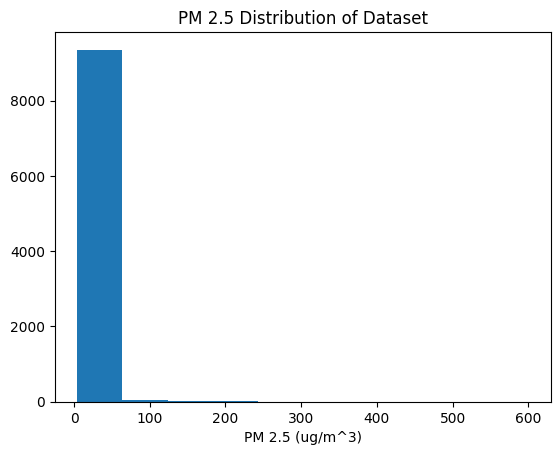

In [24]:
#distribution for each dataset
#arsenic['ResultMeasureValue'].plot(kind='hist')
plt.hist(PM['99th Percentile'])
plt.xlabel('PM 2.5 (ug/m^3)')
plt.title("PM 2.5 Distribution of Dataset")

#safety standard for PM 2.5 in air is 12 ug/m^3

Text(0.5, 1.0, 'PM 2.5 Distribution of Dataset')

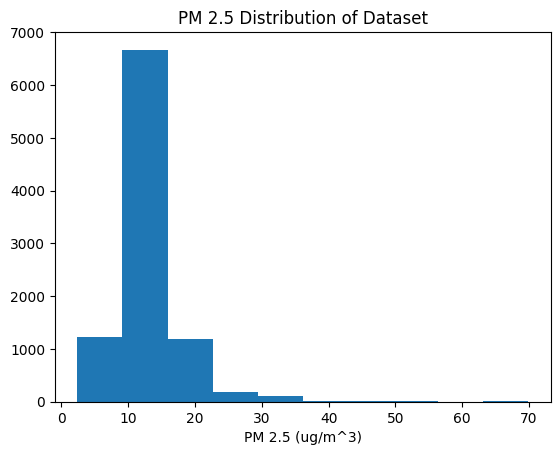

In [25]:
#distribution for each dataset
#arsenic['ResultMeasureValue'].plot(kind='hist')
plt.hist(PM['90th Percentile'])
plt.xlabel('PM 2.5 (ug/m^3)')
plt.title("PM 2.5 Distribution of Dataset")

#safety standard for PM 2.5 in air is 12 ug/m^3

<ipython-input-26-951d274df02f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(PM['99th Percentile'])


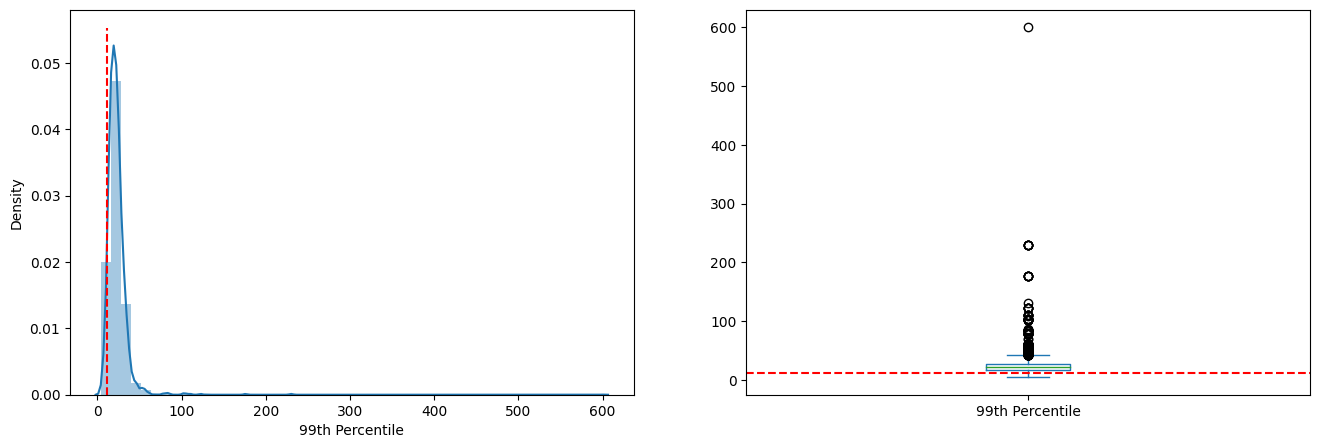

In [26]:
import seaborn as sns
plt.subplot(121), sns.distplot(PM['99th Percentile'])
reference = [12] #per https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf
bottom, top = plt.ylim()
plt.vlines(reference, ymin=bottom, ymax=top, color='r', linestyles='--')
plt.subplot(122), PM['99th Percentile'].plot.box(figsize=(16,5))
reference = [12] #per https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

<ipython-input-27-b78ecad732c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(PM['90th Percentile'])


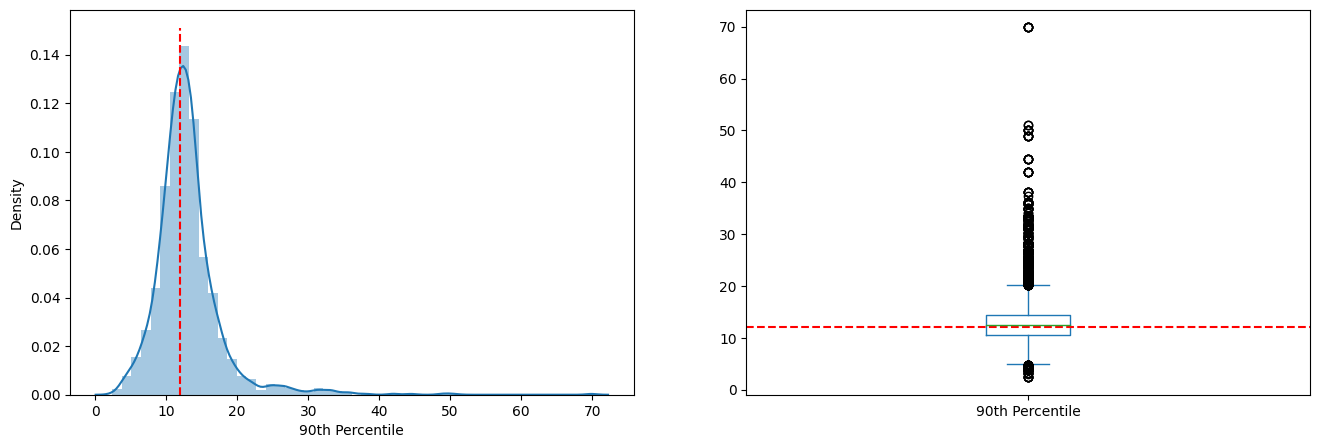

In [27]:
import seaborn as sns
plt.subplot(121), sns.distplot(PM['90th Percentile'])
reference = [12] #per https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf
bottom, top = plt.ylim()
plt.vlines(reference, ymin=bottom, ymax=top, color='r', linestyles='--')
plt.subplot(122), PM['90th Percentile'].plot.box(figsize=(16,5))
reference = [12] #per https://www.epa.gov/sites/default/files/2016-04/documents/2012_aqi_factsheet.pdf
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

Text(0.5, 1.0, 'SO2 Distribution of Dataset')

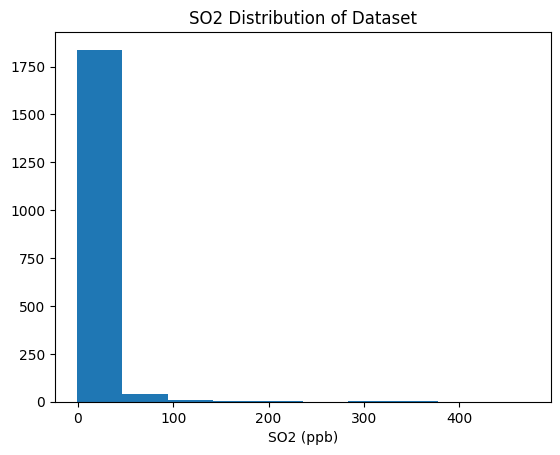

In [28]:
plt.hist(SO2['99th Percentile'])
plt.xlabel('SO2 (ppb)')
plt.title("SO2 Distribution of Dataset")

#some outliers not visible in histogram
#safe level of SO2 in air is NMT 75 ppb

Text(0.5, 1.0, 'SO2 Distribution of Dataset')

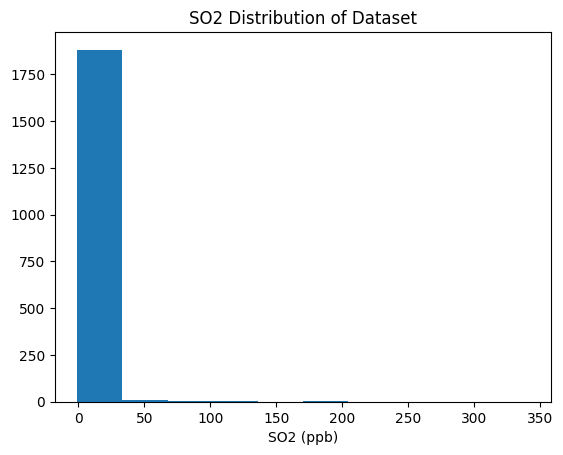

In [29]:
plt.hist(SO2['90th Percentile'])
plt.xlabel('SO2 (ppb)')
plt.title("SO2 Distribution of Dataset")

#some outliers not visible in histogram
#safe level of SO2 in air is NMT 75 ppb

<ipython-input-30-7bed5ce1baa6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(SO2['99th Percentile'])


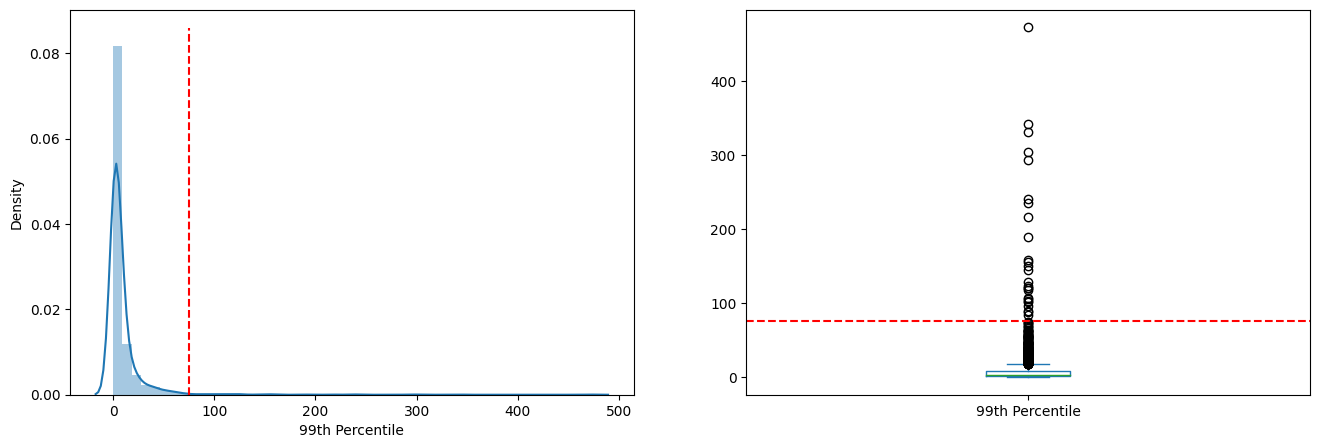

In [30]:
plt.subplot(121), sns.distplot(SO2['99th Percentile'])
reference = [75]#per https://www.epa.gov/so2-pollution/timeline-sulfur-dioxide-national-ambient-air-quality-standards-naaqs
bottom, top = plt.ylim()
plt.vlines(reference, ymin=bottom, ymax=top, color='r', linestyles='--')
plt.subplot(122), SO2['99th Percentile'].plot.box(figsize=(16,5))
reference = [75]# per https://www.epa.gov/so2-pollution/timeline-sulfur-dioxide-national-ambient-air-quality-standards-naaqs
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

<ipython-input-31-205549ac81a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(SO2['90th Percentile'])


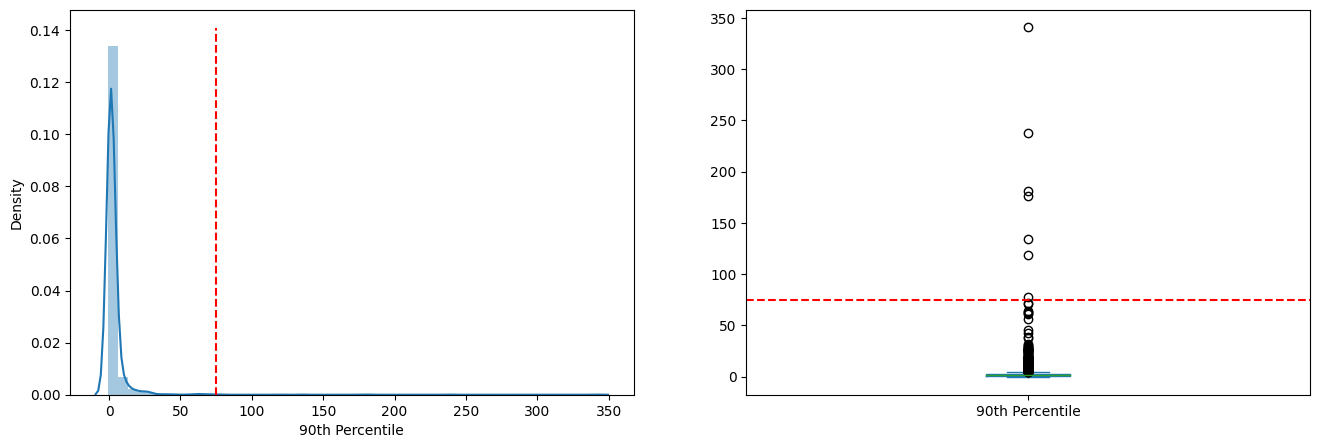

In [31]:
plt.subplot(121), sns.distplot(SO2['90th Percentile'])
reference = [75]#per https://www.epa.gov/so2-pollution/timeline-sulfur-dioxide-national-ambient-air-quality-standards-naaqs
bottom, top = plt.ylim()
plt.vlines(reference, ymin=bottom, ymax=top, color='r', linestyles='--')
plt.subplot(122), SO2['90th Percentile'].plot.box(figsize=(16,5))
reference = [75]# per https://www.epa.gov/so2-pollution/timeline-sulfur-dioxide-national-ambient-air-quality-standards-naaqs
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

Text(0.5, 1.0, 'CO Distribution of Dataset')

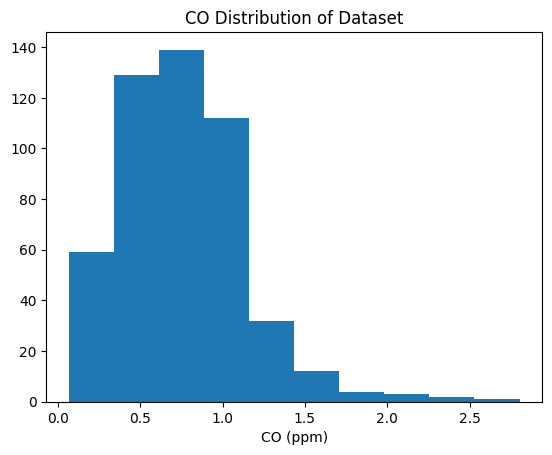

In [32]:
plt.hist(CO['99th Percentile'])
plt.xlabel('CO (ppm)')
plt.title("CO Distribution of Dataset")

#some outliers not visible in histogram
#safe level of CO in air is 9 ppm

Text(0.5, 1.0, 'CO Distribution of Dataset')

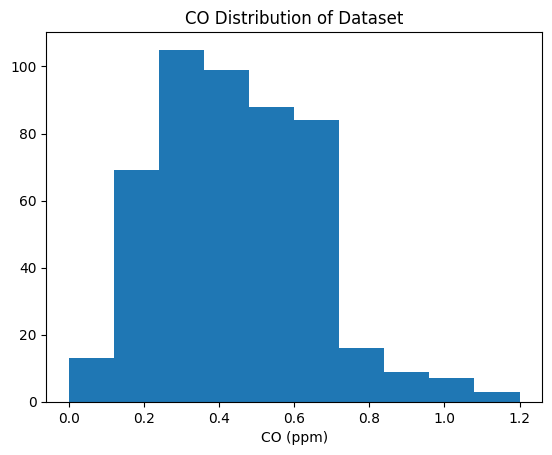

In [33]:
plt.hist(CO['90th Percentile'])
plt.xlabel('CO (ppm)')
plt.title("CO Distribution of Dataset")

#some outliers not visible in histogram
#safe level of CO in air is 9 ppm

<ipython-input-34-86cff2a85393>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(CO['99th Percentile'])


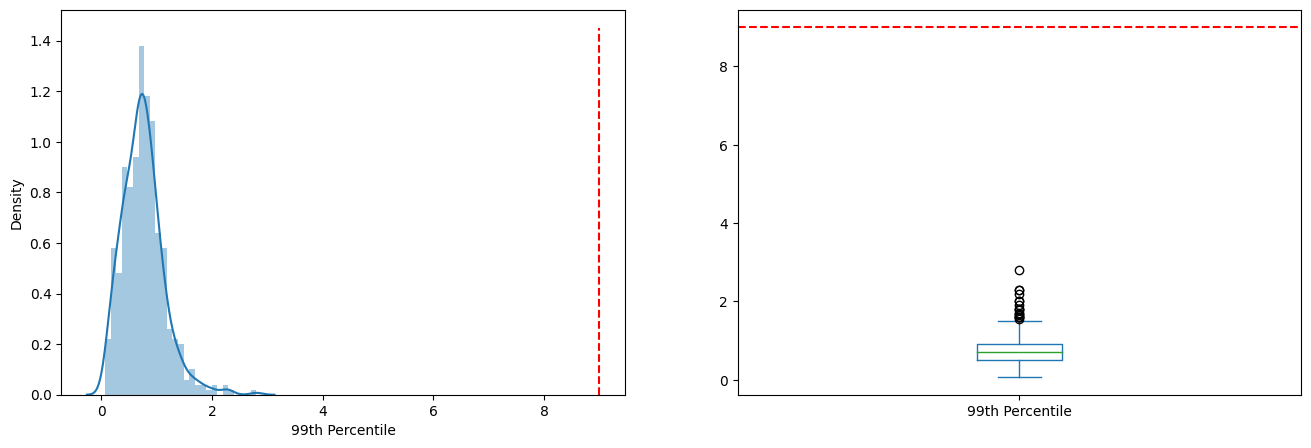

In [34]:
plt.subplot(121), sns.distplot(CO['99th Percentile'])
reference = [9]#per https://www3.epa.gov/region1/airquality/co.html
bottom, top = plt.ylim()
plt.vlines(reference, ymin=bottom, ymax=top, color='r', linestyles='--')
plt.subplot(122), CO['99th Percentile'].plot.box(figsize=(16,5))
reference = [9]# per https://www3.epa.gov/region1/airquality/co.html
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

<ipython-input-35-f20160969f46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(CO['90th Percentile'])


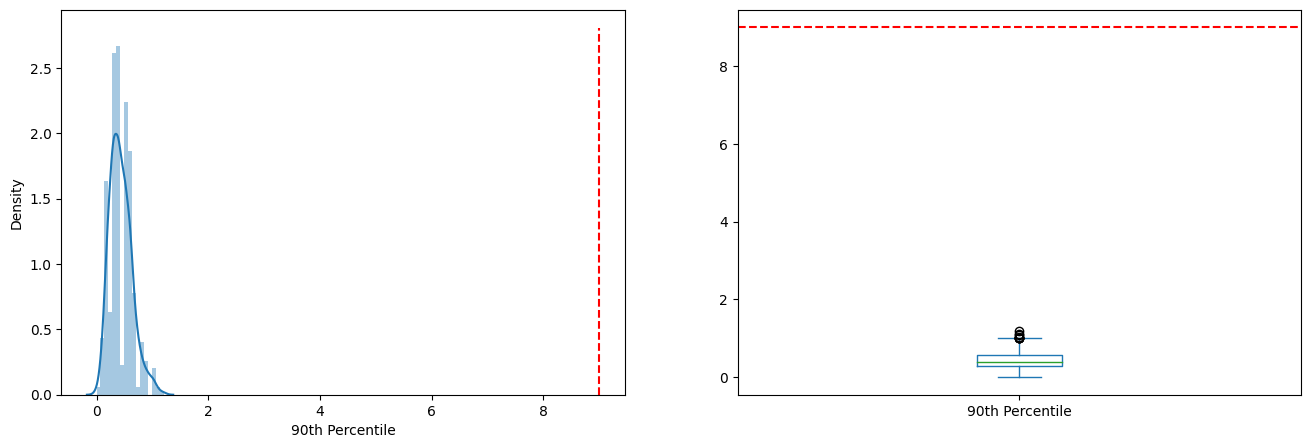

In [35]:
plt.subplot(121), sns.distplot(CO['90th Percentile'])
reference = [9]#per https://www3.epa.gov/region1/airquality/co.html
bottom, top = plt.ylim()
plt.vlines(reference, ymin=bottom, ymax=top, color='r', linestyles='--')
plt.subplot(122), CO['90th Percentile'].plot.box(figsize=(16,5))
reference = [9]# per https://www3.epa.gov/region1/airquality/co.html
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

In [36]:
PM_1 = PM['99th Percentile'] > 12
PM_1.value_counts()

True     8781
False     636
Name: 99th Percentile, dtype: int64

In [37]:
SO2_1 = SO2['99th Percentile'] > 75
SO2_1.value_counts()

False    1873
True       26
Name: 99th Percentile, dtype: int64

In [38]:
CO_1 = CO['99th Percentile'] > 9
CO_1.value_counts()

False    493
Name: 99th Percentile, dtype: int64

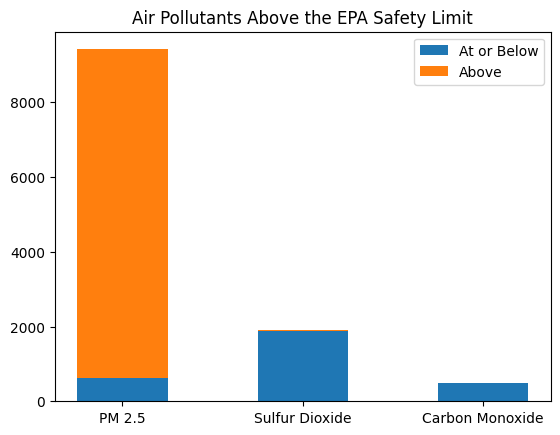

In [63]:
species = (
    "PM 2.5",
    "Sulfur Dioxide",
    "Carbon Monoxide",
    
)
weight_counts = {
    "At or Below": np.array([636, 1873, 493]),
    "Above": np.array([8781, 26, 0]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Air Pollutants Above the EPA Safety Limit")
ax.legend(loc="upper right")

plt.show()

In [40]:
PM_1 = PM['90th Percentile'] > 12
PM_1.value_counts()

True     5240
False    4177
Name: 90th Percentile, dtype: int64

In [41]:
SO2_1 = SO2['90th Percentile'] > 75
SO2_1.value_counts()

False    1892
True        7
Name: 90th Percentile, dtype: int64

In [42]:
CO_1 = CO['90th Percentile'] > 9
CO_1.value_counts()

False    493
Name: 90th Percentile, dtype: int64

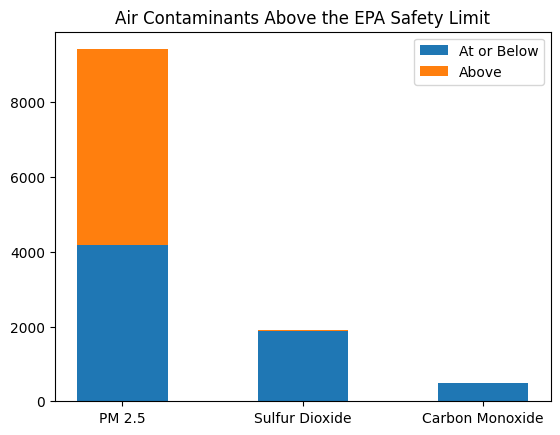

In [43]:
species = (
    "PM 2.5",
    "Sulfur Dioxide",
    "Carbon Monoxide",
    
)
weight_counts = {
    "At or Below": np.array([4177, 1892, 493]),
    "Above": np.array([5240, 7, 0]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Air Contaminants Above the EPA Safety Limit")
ax.legend(loc="upper right")

plt.show()

In [ ]:
#Show on Map locations where these chemicals are above the EPA regulation limit

In [44]:
#zip coordinates into latitude and longitude together
PM["Coordinates"] = list(zip(PM['Longitude'], PM['Latitude']))
PM.head()

<ipython-input-44-491e664a5988>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM["Coordinates"] = list(zip(PM['Longitude'], PM['Latitude']))


,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile,90th Percentile,50th Percentile,Coordinates
4,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,"(-87.880258, 30.497478)"
5,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,"(-87.880258, 30.497478)"
6,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,"(-87.880258, 30.497478)"
7,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,"(-87.880258, 30.497478)"
8,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,"(-87.880258, 30.497478)"


In [45]:
#turn coordinates tuple into shapely point object
PM["Coordinates"] = PM["Coordinates"].apply(Point)
PM.head()

<ipython-input-45-57abfe486b7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM["Coordinates"] = PM["Coordinates"].apply(Point)


,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile,90th Percentile,50th Percentile,Coordinates
4,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.880258 30.497478)
5,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.880258 30.497478)
6,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.880258 30.497478)
7,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.880258 30.497478)
8,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.880258 30.497478)


In [46]:
#convert dataframe into geodata frame
PMdf = gpd.GeoDataFrame(PM, geometry="Coordinates")
PMdf.head()

,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile,90th Percentile,50th Percentile,Coordinates
4,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.88026 30.49748)
5,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.88026 30.49748)
6,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.88026 30.49748)
7,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.88026 30.49748)
8,30.497478,-87.880258,PM2.5 - Local Conditions,24 HOUR,Micrograms/cubic meter (LC),33.6,12.3,7.3,POINT (-87.88026 30.49748)


In [ ]:
n = PMdf[((PMdf["99th Percentile"] <= 12))].index
PMdf = PMdf.drop(n)

In [ ]:
PMdf['Units of Measure'].value_counts()

Micrograms/cubic meter (LC)    8781
Name: Units of Measure, dtype: int64

In [ ]:
#zip coordinates into latitude and longitude together
SO2["Coordinates"] = list(zip(SO2['Longitude'], SO2['Latitude']))
SO2.head()

<ipython-input-44-35ec4ac9f4ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SO2["Coordinates"] = list(zip(SO2['Longitude'], SO2['Latitude']))


,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile,Coordinates
50,33.553056,-86.815,Sulfur dioxide,1 HOUR,Parts per billion,9.8,"(-86.815, 33.553056)"
51,33.553056,-86.815,Sulfur dioxide,1 HOUR,Parts per billion,3.3,"(-86.815, 33.553056)"
52,33.553056,-86.815,Sulfur dioxide,24-HR BLK AVG,Parts per billion,1.5,"(-86.815, 33.553056)"
53,33.553056,-86.815,Sulfur dioxide,3-HR BLK AVG,Parts per billion,2.9,"(-86.815, 33.553056)"
179,33.485556,-86.915,Sulfur dioxide,1 HOUR,Parts per billion,6.2,"(-86.915, 33.485556)"


In [ ]:
#turn coordinates tuple into shapely point object
SO2["Coordinates"] = SO2["Coordinates"].apply(Point)
SO2.head()

<ipython-input-45-5053595fd3f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SO2["Coordinates"] = SO2["Coordinates"].apply(Point)


,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile,Coordinates
50,33.553056,-86.815,Sulfur dioxide,1 HOUR,Parts per billion,9.8,POINT (-86.815 33.553056)
51,33.553056,-86.815,Sulfur dioxide,1 HOUR,Parts per billion,3.3,POINT (-86.815 33.553056)
52,33.553056,-86.815,Sulfur dioxide,24-HR BLK AVG,Parts per billion,1.5,POINT (-86.815 33.553056)
53,33.553056,-86.815,Sulfur dioxide,3-HR BLK AVG,Parts per billion,2.9,POINT (-86.815 33.553056)
179,33.485556,-86.915,Sulfur dioxide,1 HOUR,Parts per billion,6.2,POINT (-86.915 33.485556)


In [ ]:
#convert dataframe into geodata frame
SO2df = gpd.GeoDataFrame(SO2, geometry="Coordinates")
SO2.head()

,Latitude,Longitude,Parameter Name,Sample Duration,Units of Measure,99th Percentile,Coordinates
50,33.553056,-86.815,Sulfur dioxide,1 HOUR,Parts per billion,9.8,POINT (-86.81500 33.55306)
51,33.553056,-86.815,Sulfur dioxide,1 HOUR,Parts per billion,3.3,POINT (-86.81500 33.55306)
52,33.553056,-86.815,Sulfur dioxide,24-HR BLK AVG,Parts per billion,1.5,POINT (-86.81500 33.55306)
53,33.553056,-86.815,Sulfur dioxide,3-HR BLK AVG,Parts per billion,2.9,POINT (-86.81500 33.55306)
179,33.485556,-86.915,Sulfur dioxide,1 HOUR,Parts per billion,6.2,POINT (-86.91500 33.48556)


In [ ]:
m = SO2df[((SO2df["99th Percentile"] <= 75))].index
SO2df = SO2df.drop(m)

In [ ]:
SO2df['Units of Measure'].value_counts()

Parts per billion    26
Name: Units of Measure, dtype: int64

In [ ]:
#load ckd by US county dataset
ckd = ("/content/gdrive/MyDrive/Team 52 Project Folders/Datasets/CKD_US_2019.csv")

ckd = pd.read_csv(ckd)

In [ ]:
ckd.head()

,Main Value,County,State
0,22.35,AUTAUGA,Alabama
1,21.21,BALDWIN,Alabama
2,23.53,BARBOUR,Alabama
3,37.21,BIBB,Alabama
4,31.03,BLOUNT,Alabama


In [ ]:
ckd["County"] = ckd["County"].apply(str.lower)
ckd.head(50)

,Main Value,County,State
0,22.35,autauga,Alabama
1,21.21,baldwin,Alabama
2,23.53,barbour,Alabama
3,37.21,bibb,Alabama
4,31.03,blount,Alabama
5,20.00,bullock,Alabama
6,29.46,butler,Alabama
7,25.12,calhoun,Alabama
8,27.51,chambers,Alabama
9,35.17,cherokee,Alabama


In [ ]:
ckd["County"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3123 entries, 0 to 3122
Series name: County
Non-Null Count  Dtype 
--------------  ----- 
3123 non-null   object
dtypes: object(1)
memory usage: 24.5+ KB


In [ ]:
county["NAME"] = county["NAME"].apply(str.lower)
county.rename(columns = {'NAME':"County"}, inplace = True)

county.rename(columns = {'STATE_NAME':"State"}, inplace = True)
county.head(50)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,NAMELSAD,STUSPS,State,LSAD,ALAND,AWATER,geometry
0,01,069,00161560,0500000US01069,01069,houston,Houston County,AL,Alabama,06,1501742235,4795415,"POLYGON ((-85.71209 31.19727, -85.70934 31.198..."
1,01,023,00161537,0500000US01023,01023,choctaw,Choctaw County,AL,Alabama,06,2365900083,19114321,"POLYGON ((-88.47323 31.89386, -88.46888 31.930..."
2,01,005,00161528,0500000US01005,01005,barbour,Barbour County,AL,Alabama,06,2292160151,50523213,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
3,01,107,00161580,0500000US01107,01107,pickens,Pickens County,AL,Alabama,06,2282835044,22621093,"POLYGON ((-88.34043 32.99120, -88.33101 33.072..."
4,01,033,00161542,0500000US01033,01033,colbert,Colbert County,AL,Alabama,06,1535742270,79160396,"POLYGON ((-88.13925 34.58779, -88.13872 34.589..."
5,04,012,00043540,0500000US04012,04012,la paz,La Paz County,AZ,Arizona,06,11646086560,36514347,"POLYGON ((-114.73122 33.30404, -114.72990 33.3..."
6,04,001,00025441,0500000US04001,04001,apache,Apache County,AZ,Arizona,06,29003497233,54139714,"POLYGON ((-110.00068 36.99798, -110.00068 36.9..."
7,05,081,00066874,0500000US05081,05081,little river,Little River County,AR,Arkansas,06,1375943077,83115227,"POLYGON ((-94.48558 33.65331, -94.48553 33.663..."
8,05,121,00069178,0500000US05121,05121,randolph,Randolph County,AR,Arkansas,06,1688445989,10370823,"POLYGON ((-91.40687 36.49712, -91.40514 36.497..."
9,06,037,00277283,0500000US06037,06037,los angeles,Los Angeles County,CA,California,06,10515988166,1785003207,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [ ]:
county["County"].info()

<class 'pandas.core.series.Series'>
Int64Index: 3144 entries, 0 to 3234
Series name: County
Non-Null Count  Dtype 
--------------  ----- 
3144 non-null   object
dtypes: object(1)
memory usage: 49.1+ KB


In [ ]:
#merge dataframes based on matching county names
ckd_1 = pd.merge(ckd, county, on = ["County", "State"])
ckd_1

,Main Value,County,State,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAMELSAD,STUSPS,LSAD,ALAND,AWATER,geometry
0,22.35,autauga,Alabama,01,001,00161526,0500000US01001,01001,Autauga County,AL,06,1539631461,25677536,"POLYGON ((-86.92120 32.65754, -86.92035 32.658..."
1,21.21,baldwin,Alabama,01,003,00161527,0500000US01003,01003,Baldwin County,AL,06,4117724893,1132887353,"POLYGON ((-88.02858 30.22676, -88.02399 30.230..."
2,23.53,barbour,Alabama,01,005,00161528,0500000US01005,01005,Barbour County,AL,06,2292160151,50523213,"POLYGON ((-85.74803 31.61918, -85.74544 31.618..."
3,37.21,bibb,Alabama,01,007,00161529,0500000US01007,01007,Bibb County,AL,06,1612188713,9572302,"POLYGON ((-87.42194 33.00338, -87.31854 33.006..."
4,31.03,blount,Alabama,01,009,00161530,0500000US01009,01009,Blount County,AL,06,1670259093,14860281,"POLYGON ((-86.96336 33.85822, -86.95967 33.857..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,17.86,sweetwater,Wyoming,56,037,01609192,0500000US56037,56037,Sweetwater County,WY,06,27005754360,166230245,"POLYGON ((-110.05438 42.01103, -110.05436 42.0..."
3021,9.93,teton,Wyoming,56,039,01605083,0500000US56039,56039,Teton County,WY,06,10351790287,570858887,"POLYGON ((-111.05361 44.66627, -110.75076 44.6..."
3022,14.04,uinta,Wyoming,56,041,01605084,0500000US56041,56041,Uinta County,WY,06,5391631764,16625817,"POLYGON ((-111.04662 41.15604, -111.04659 41.2..."
3023,16.87,washakie,Wyoming,56,043,01605085,0500000US56043,56043,Washakie County,WY,06,5798152470,10415890,"POLYGON ((-108.55056 44.16846, -108.50652 44.1..."


In [ ]:
ckd_1.to_csv('ckd_1.csv')

In [ ]:
ckd_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 0 to 3024
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Main Value  3025 non-null   float64 
 1   County      3025 non-null   object  
 2   State       3025 non-null   object  
 3   STATEFP     3025 non-null   object  
 4   COUNTYFP    3025 non-null   object  
 5   COUNTYNS    3025 non-null   object  
 6   AFFGEOID    3025 non-null   object  
 7   GEOID       3025 non-null   object  
 8   NAMELSAD    3025 non-null   object  
 9   STUSPS      3025 non-null   object  
 10  LSAD        3025 non-null   object  
 11  ALAND       3025 non-null   int64   
 12  AWATER      3025 non-null   int64   
 13  geometry    3025 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(10)
memory usage: 354.5+ KB


In [ ]:
ckd_1["Main Value"].info()

<class 'pandas.core.series.Series'>
Int64Index: 3025 entries, 0 to 3024
Series name: Main Value
Non-Null Count  Dtype  
--------------  -----  
3025 non-null   float64
dtypes: float64(1)
memory usage: 47.3 KB


In [ ]:
ckd_1.isna().sum()

Main Value    0
County        0
State         0
STATEFP       0
COUNTYFP      0
COUNTYNS      0
AFFGEOID      0
GEOID         0
NAMELSAD      0
STUSPS        0
LSAD          0
ALAND         0
AWATER        0
geometry      0
dtype: int64

<ipython-input-62-9e81ff619212>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(ckd_1['Main Value'])


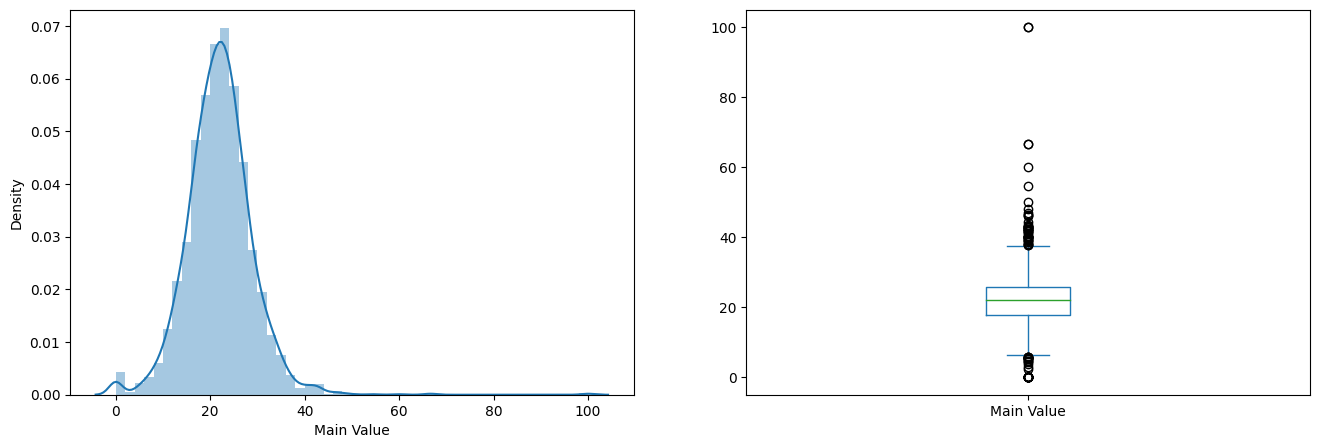

In [ ]:
plt.subplot(121), sns.distplot(ckd_1['Main Value'])
plt.subplot(122), ckd_1['Main Value'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
type(ckd_1)

pandas.core.frame.DataFrame

In [ ]:
#COnvert ckd_1 dataframe into geopandas dataframe
ckd_1 = gpd.GeoDataFrame(ckd_1,  geometry = ckd_1['geometry'])

In [ ]:
type(ckd_1)

geopandas.geodataframe.GeoDataFrame

In [ ]:
ckd_1.crs = "EPSG: 4326"

In [ ]:
ckd_1= ckd_1.to_crs("EPSG: 4326")

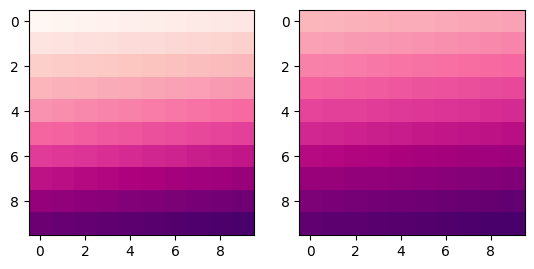

In [ ]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
  new_cmap = colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),cmap(np.linspace(minval, maxval, n)))

  return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)
cmap = plt.get_cmap('RdPu')
new_cmap = truncate_colormap(cmap, 0.3, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

In [ ]:

#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(50,50))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
ckd_1.plot(column = 'Main Value', cmap = 'RdPu', ax = gax, edgecolor='black', legend = True)

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
#ckd_1.plot(column = 'Main Value', cmap = 'Blues', ax=gax, legend = True)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('% Population of >65 with CKD by US County')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

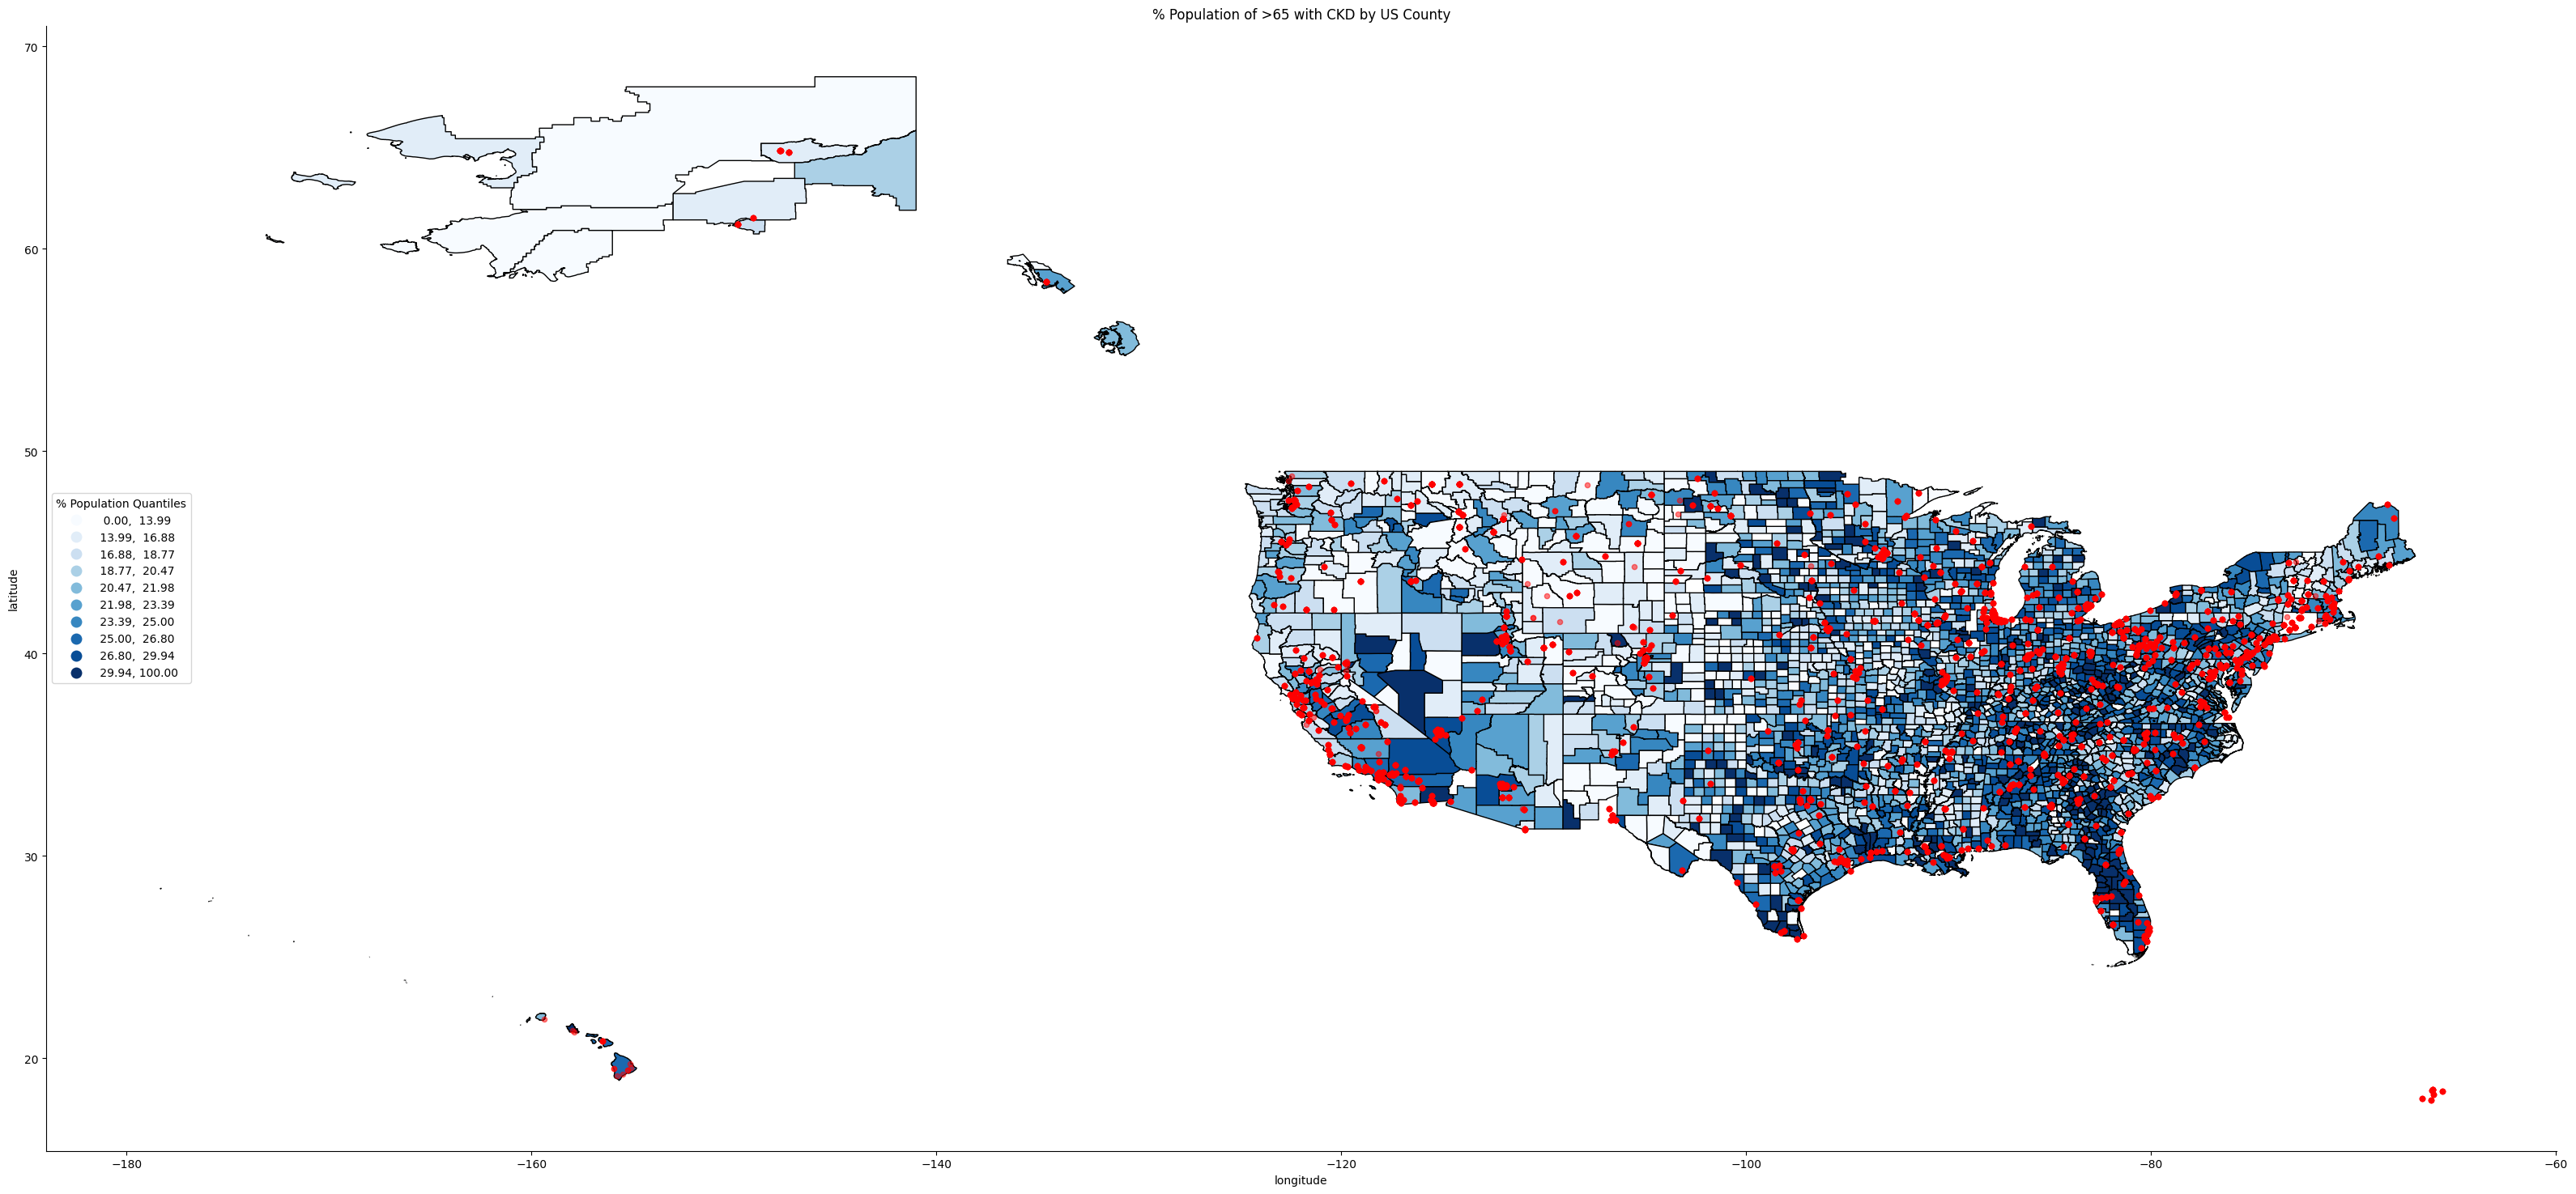

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(40, 24))



# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
ckd_1.plot(column = 'Main Value', scheme = "QUANTILES", k = 10, cmap = 'Blues', ax = gax, edgecolor='black', legend = True, legend_kwds={'loc': 'center left', 'title': '% Population Quantiles'})


# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
#ckd_1.plot(column = 'Main Value', cmap = 'Blues', ax=gax, legend = True)
PMdf.plot(ax=gax, marker = 'o', color='red', markersize=20, alpha = 0.5, legend = False)#arsenic exceeding EPA limit
#ldf.plot(ax=gax, marker = 'o', color='yellow', markersize=10, alpha = 0.5, legend = False)#lead exceeding EPA Limit
#cdf.plot(ax=gax, marker = 'o', color='orange', markersize=10, alpha = 0.5, legend = False)#cadmium exceeding EPA limit
#mdf.plot(ax=gax, marker = 'o', color='green', markersize=10, alpha = 0.5, legend = False)#mercury excceeding EPA limit


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('% Population of >65 with CKD by US County')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

PM 2.5 and Kidney Disease: https://journals.sagepub.com/doi/10.1177/09603271211069982

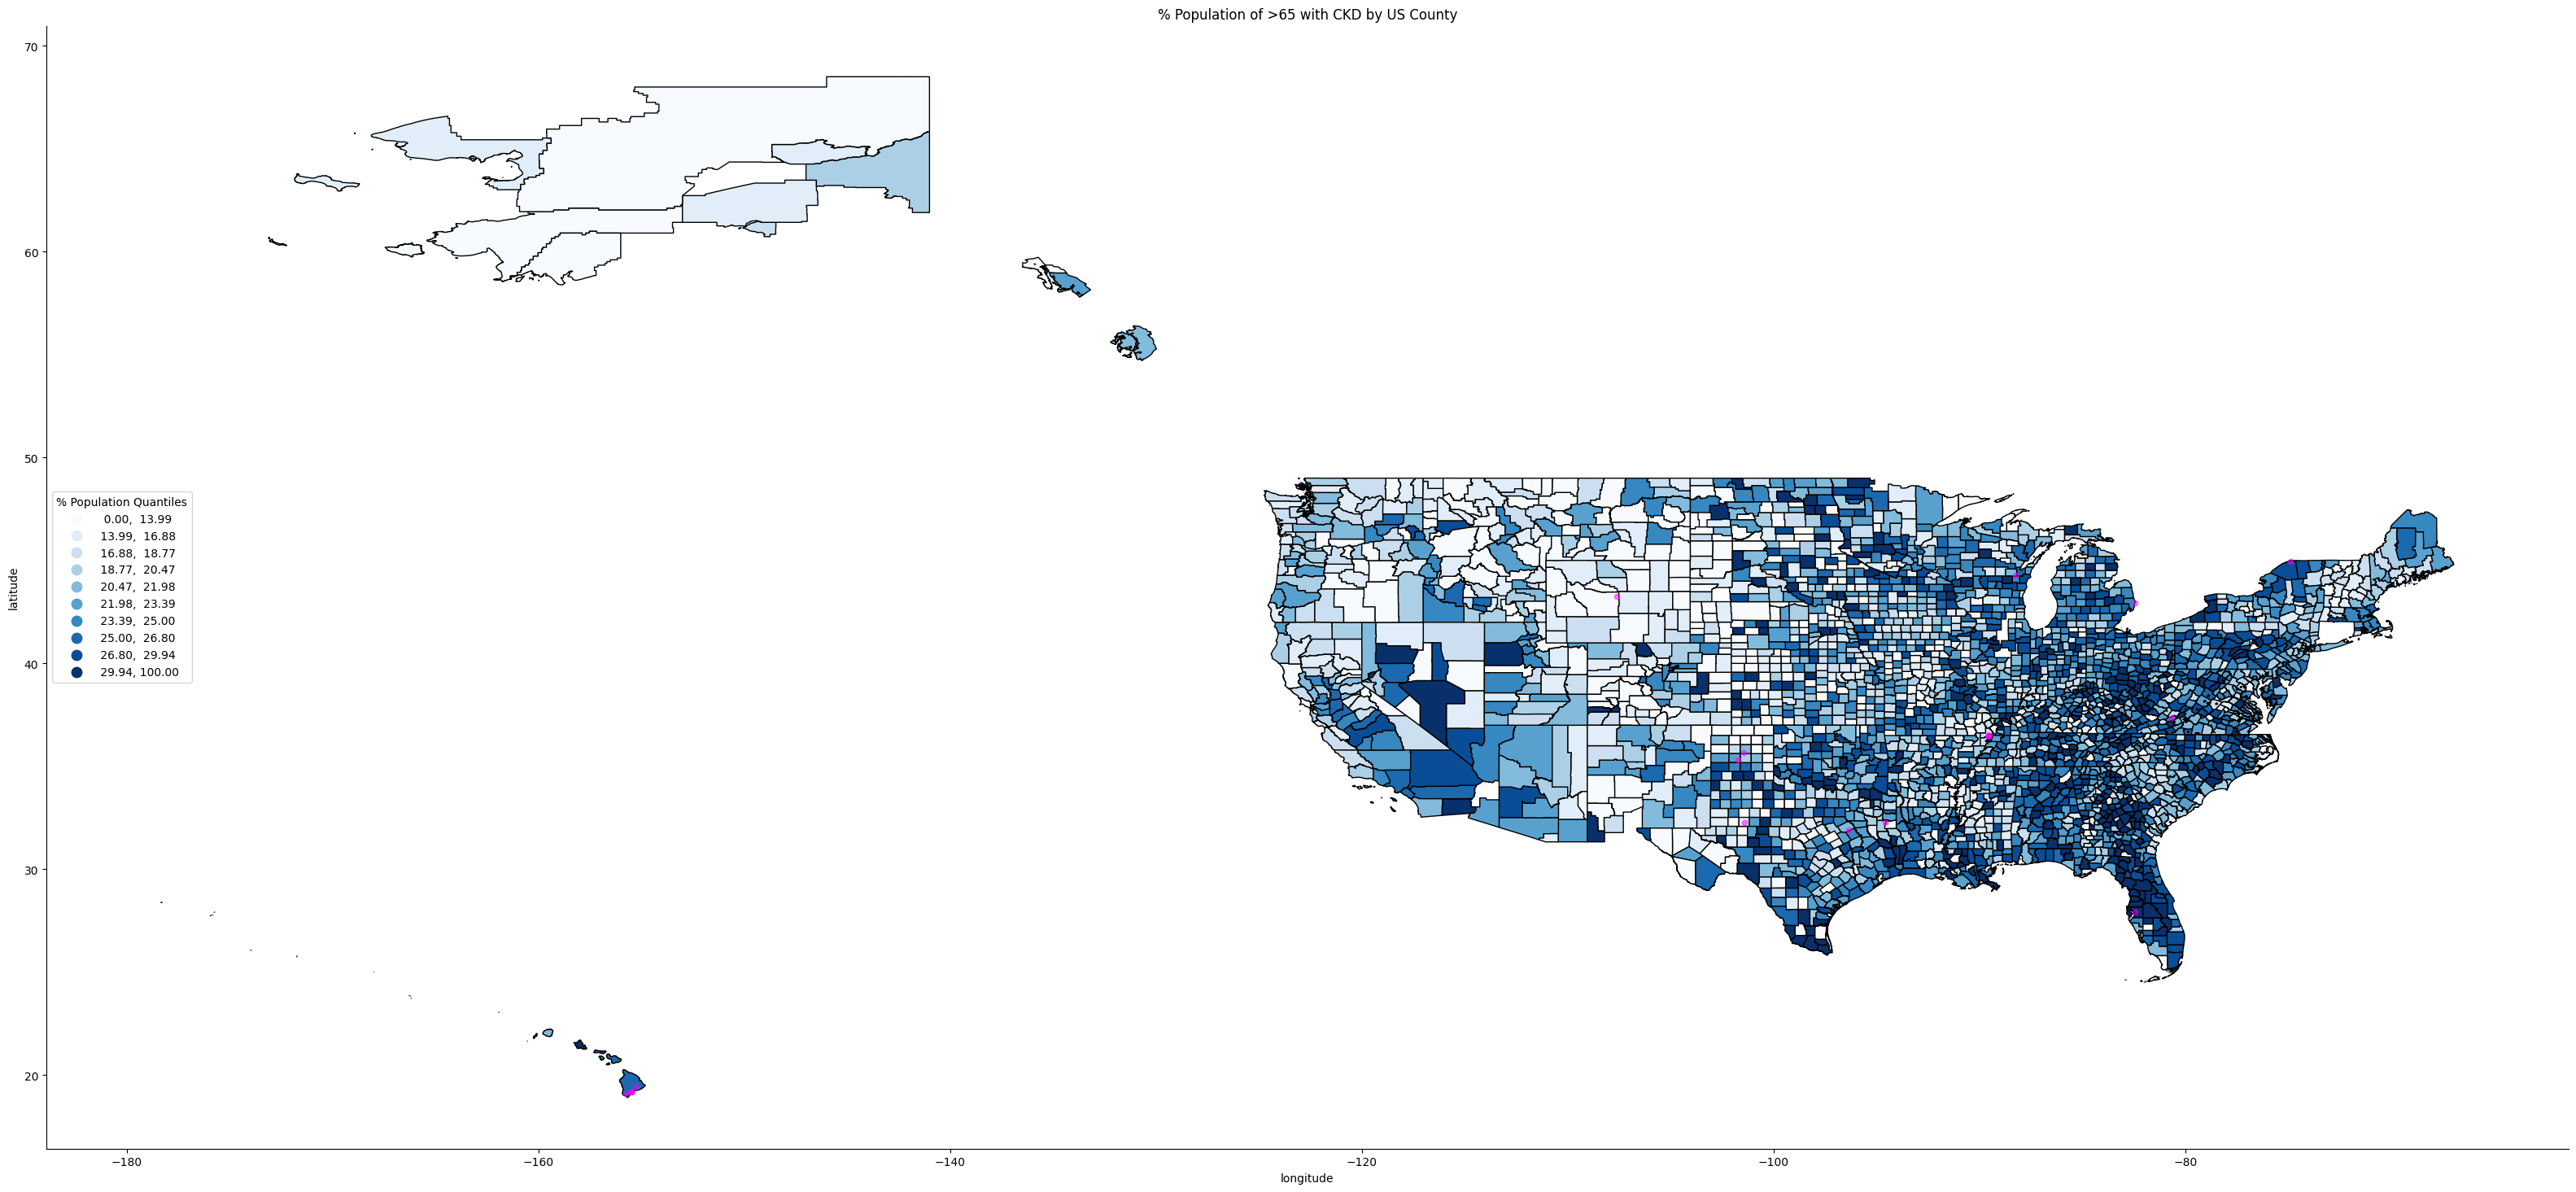

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(40,24))



# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
ckd_1.plot(column = 'Main Value', scheme = "QUANTILES", k = 10, cmap = 'Blues', ax = gax, edgecolor='black', legend = True, legend_kwds={'loc': 'center left', 'title': '% Population Quantiles'})


# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
#ckd_1.plot(column = 'Main Value', cmap = 'Blues', ax=gax, legend = True)
#adf.plot(ax=gax, marker = 'o', color='red', markersize=10, alpha = 0.5, legend = False)#arsenic exceeding EPA limit
SO2df.plot(ax=gax, marker = 'o', color='fuchsia', markersize=20, alpha = 0.5, legend = False)#lead exceeding EPA Limit
#cdf.plot(ax=gax, marker = 'o', color='orange', markersize=10, alpha = 0.5, legend = False)#cadmium exceeding EPA limit
#mdf.plot(ax=gax, marker = 'o', color='green', markersize=10, alpha = 0.5, legend = False)#mercury excceeding EPA limit


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('% Population of >65 with CKD by US County')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

SO2 and CO and Kidney Disease: https://www.ajmc.com/view/long-term-exposure-to-air-pollution-associated-with-ckd

Code that did not work below:

In [ ]:
grouped = ckd.groupby(ckd.State)
ckd_AL = grouped.get_group("Alabama")
ckd_AL

,Main Value,County,State
0,22.35,AUTAUGA,Alabama
1,21.21,BALDWIN,Alabama
2,23.53,BARBOUR,Alabama
3,37.21,BIBB,Alabama
4,31.03,BLOUNT,Alabama
...,...,...,...
62,26.54,TUSCALOOSA,Alabama
63,39.74,WALKER,Alabama
64,24.10,WASHINGTON,Alabama
65,26.42,WILCOX,Alabama


In [ ]:
df_1 = ckd.iloc[:1000,:]
df_2 = ckd.iloc[1000:2000,:]
df_3 = ckd.iloc[2000:,:]
print("Shape of new dataframes - {} , {}, {}".format(df_1.shape, df_2.shape, df_3.shape))

Shape of new dataframes - (1000, 3) , (1000, 3), (1123, 3)


In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(county):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(county)
      
    except GeocoderTimedOut:
          
        return findGeocode(county)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df_1["County"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

#Showing the output produced as dataframe.

# now add this column to dataframe
df_1["Longitude"] = longitude
df_1["Latitude"] = latitude
  
df_1

<ipython-input-153-e97aa2cf7524>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Longitude"] = longitude
<ipython-input-153-e97aa2cf7524>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Latitude"] = latitude


,Main Value,County,State,Longitude,Latitude
0,22.35,AUTAUGA,Alabama,-86.631940,32.516526
1,21.21,BALDWIN,Alabama,-83.263322,33.086940
2,23.53,BARBOUR,Alabama,-85.403208,31.858931
3,37.21,BIBB,Alabama,-83.694562,32.809588
4,31.03,BLOUNT,Alabama,-86.570200,33.951017
...,...,...,...,...,...
995,21.59,CALDWELL,Kentucky,-97.595964,29.829897
996,17.16,CALLOWAY,Kentucky,-88.271076,36.625794
997,26.59,CAMPBELL,Kentucky,-84.371529,38.933980
998,31.03,CARLISLE,Kentucky,-2.936231,54.894848


In [ ]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(county):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(county)
      
    except GeocoderTimedOut:
          
        return findGeocode(county)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df_2["County"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

#Showing the output produced as dataframe.

# now add this column to dataframe
df_2["Longitude"] = longitude
df_2["Latitude"] = latitude
  
df_2

In [ ]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(county):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(county)
      
    except GeocoderTimedOut:
          
        return findGeocode(county)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df_3["County"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

#Showing the output produced as dataframe.

# now add this column to dataframe
df_3["Longitude"] = longitude
df_3["Latitude"] = latitude
  
df_3

In [ ]:
frames = [df_1, df_2, df_3]
newckd = pd.concat(frames)

In [ ]:
newckd.to_csv('ckd_prevalence_us.csv')